In [1]:
import pymysql,sys
import seaborn as sns
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = pymysql.connect(host='localhost',user='root',passwd='pulsetini', db='nairaland',charset='utf8')
cur = conn.cursor()
cur2 = conn.cursor()

In [3]:
sns.set_style("white")
sns.despine()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})

###### Comment thread length for each post

In [35]:
cur2.execute('select parent,count(*) from comments3 group by parent')

151327

In [36]:
n=0
for r in cur2:
    res=cur.execute('update posts3 set nComments='+str(r[1])+' where parent='+str(r[0]))
    cur.connection.commit()
    if n%1000==0:
        print n
    n+=1
    '''
    if not res==1:
        print '?',r,res
        sys.exit(1)
    '''

0


KeyboardInterrupt: 

In [ ]:
cur.execute('select count(*) from comments group by parent')

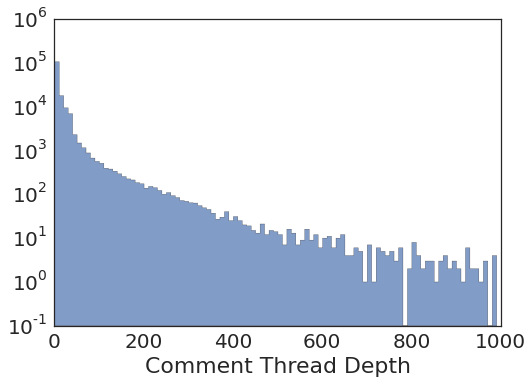

In [24]:
plt.hist([r[0] for r in cur],bins=[1+(i*10) for i in range(100)],log=True,histtype="stepfilled",alpha=0.7)
plt.xlabel('Comment Thread Depth')
plt.savefig('comment_dist.png',dpi=200)

###### User Degree Distribution

In [15]:
activeDegreeDf=pd.read_sql_query('select count(*) from following group by source',conn)
activeDegreeDf.columns=['degree']
inactiveDegreeDf=pd.read_sql_query('select count(*) from following_new group by source',conn)
inactiveDegreeDf.columns=['degree']

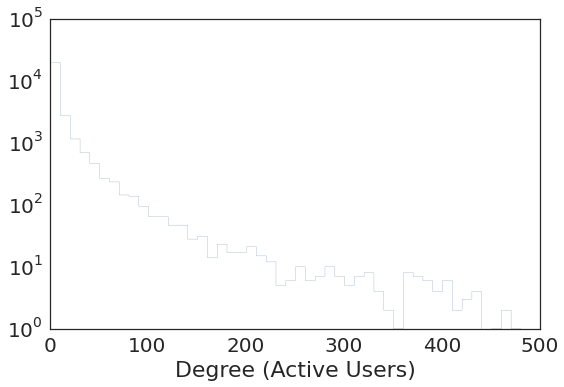

In [18]:
plt.hist(activeDegreeDf.degree.values,bins=[1+(i*10) for i in range(50)],log=True,histtype="step",alpha=0.7)
plt.xlabel('Degree (Active Users)')
plt.tight_layout()
plt.ylim(1,10**5)
plt.savefig('degree_dist.png',dpi=200)

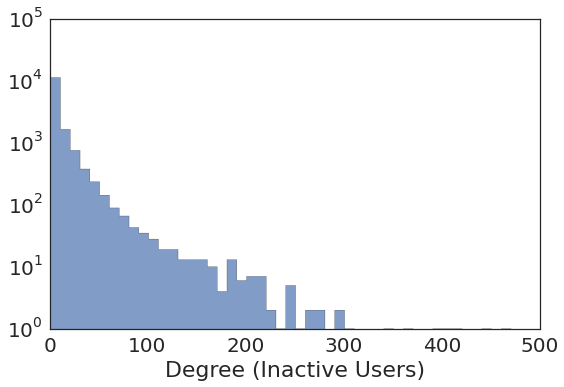

In [17]:
plt.hist(inactiveDegreeDf.degree.values,bins=[1+(i*10) for i in range(50)],log=True,histtype="stepfilled",alpha=0.7)
plt.xlabel('Degree (Inactive Users)')
plt.tight_layout()
plt.ylim(1,10**5)
plt.savefig('degree_dist.png',dpi=200)

In [29]:
?plt.hist

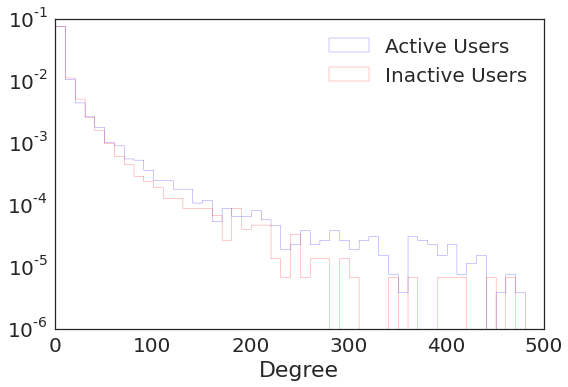

In [30]:
plt.hist(activeDegreeDf.degree.values,bins=[1+(i*10) for i in range(50)],normed=True,log=True,histtype="step",alpha=0.7,color='b',label='Active Users')
plt.hist(inactiveDegreeDf.degree.values,bins=[1+(i*10) for i in range(50)],normed=True,log=True,histtype="step",alpha=0.7,color='r',label='Inactive Users')
plt.xlabel('Degree')
plt.tight_layout()
plt.ylim(10**-6,0.1)
plt.legend()
plt.savefig('degree_dist.png',dpi=200)

###### Comment time distribution

In [4]:
comments=pd.read_sql_query('select time from comments',conn)
comments.index=pd.to_datetime(comments.time)
comments['hour']=comments.index.hour
comments['minute']=comments.index.minute
comments['hourminute']=comments.hour+((comments.minute)/60.0)
comments.hourminute[0:5].values
plt.hist(comments.hourminute[0:].values,bins=[(i*0.25) for i in range(24*4)],log=True,histtype="stepfilled",alpha=0.7)
plt.xlabel('Hour')
plt.tight_layout()
plt.ylim(10**3,10**5)
plt.xlim(-0.125,23.825)
plt.savefig('comments_hour_dist.png',dpi=200)
plt.show()

0

###### Post time distribution

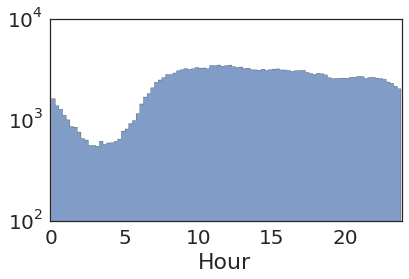

In [38]:
posts=pd.read_sql_query('select time from posts2',conn)
posts.index=pd.to_datetime(posts.time)
posts['hour']=posts.index.hour
posts['minute']=posts.index.minute
posts['hourminute']=posts.hour+((posts.minute)/60.0)
posts.hourminute[0:5].values
plt.hist(posts.hourminute[0:].values,bins=[(i*0.25) for i in range(24*4)],log=True,histtype="stepfilled",alpha=0.7)
plt.xlabel('Hour')
plt.tight_layout()
plt.ylim(10**2,10**4)
plt.xlim(-0.125,23.825)
plt.savefig('posts_hour_dist.png',dpi=200)
plt.show()

In [9]:
posts=pd.read_sql_query('select time from posts3',conn)

In [10]:
posts.index=posts.time

In [11]:
posts['dummy']=1

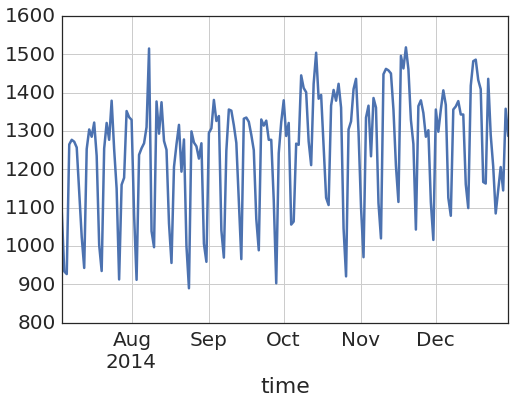

In [12]:
posts.resample('d',how='sum')['dummy'].plot()

In [13]:
posts.resample('d',how='sum')['dummy']

time
2014-07-04    1090
2014-07-05     934
2014-07-06     927
2014-07-07    1265
2014-07-08    1277
2014-07-09    1272
2014-07-10    1257
2014-07-11    1138
2014-07-12    1024
2014-07-13     943
2014-07-14    1253
2014-07-15    1304
2014-07-16    1285
2014-07-17    1322
2014-07-18    1235
...
2014-12-16    1482
2014-12-17    1486
2014-12-18    1433
2014-12-19    1409
2014-12-20    1167
2014-12-21    1163
2014-12-22    1436
2014-12-23    1290
2014-12-24    1208
2014-12-25    1085
2014-12-26    1145
2014-12-27    1206
2014-12-28    1145
2014-12-29    1358
2014-12-30    1287
Freq: D, Name: dummy, Length: 180

In [4]:
comments=pd.read_sql_query('select time from comments3',conn)

In [5]:
comments.index=comments.time

In [6]:
comments['dummy']=1

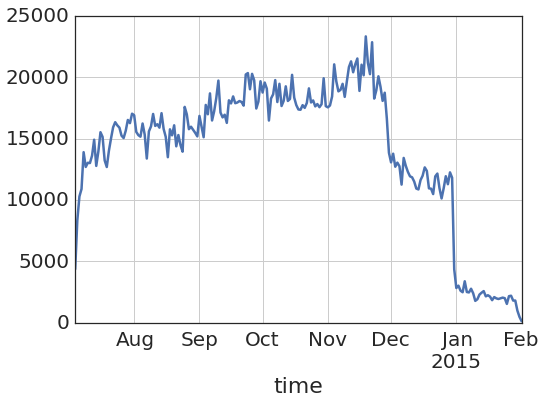

In [7]:
comments.resample('d',how='sum')['dummy'].plot()

###### Look at how comments drop off from single posts

In [ ]:
# 1879087
# 2014-08-29 17:04:00

In [12]:
commentsDist=pd.read_sql_query('select time,user from comments3 where parent=1849516',conn)

In [15]:
import numpy as np
from igraph import *

In [20]:
allUsers=list(set(commentsDist.user.values))

In [28]:
adjacency=np.zeros(shape=(len(allUsers),len(allUsers)))

In [ ]:
for n1,u1 in enumerate(allUsers):
    print n1,u1
    for n2,u2 in enumerate(allUsers):
        link=pd.read_sql_query("select source from following where source='"+u1+"' and target='"+u2+"'",conn)
        if link.shape[0]>0:
            adjacency[n1][n2]=1
    

0 Bunchersstab
1 Acidosis
2 STENON
3 HARDDON
4 Leetunechi
5 RaeMystix
6 Elnino4ladies
7 Preciousone4ril
8 joanpinkie
9 chibwike
10 shayoor
11 lepasharon
12 GbemiOO
13 Kaymania
14 FancyClock
15 harlos
16 cupidhero
17

In [ ]:
adjacency.

In [ ]:
with open('adjacency_1849516.tsv','w') as outF:
    np.savetxt(outF,adjacency,delimiter='\t')

In [ ]:
with open('names_1849516.tsv','w') as outF:
    outF.write('\n'.join(allUsers))

In [6]:
postsDist=pd.read_sql_query('select time from posts3 where parent=1849516',conn)
commentsDist=pd.read_sql_query('select time from comments3 where parent=1849516',conn)
commentsDist['diff']=commentsDist['time'].apply(lambda x:x-postsDist.irow(0))
commentsDist['diff']=commentsDist['diff'].apply(lambda x:pd.tslib.Timedelta(x).total_seconds())

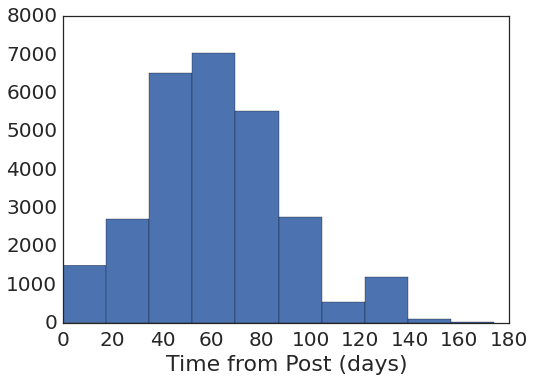

In [8]:
plt.hist(commentsDist['diff'].apply(lambda x:x/float(24*60*60)))
plt.xlabel('Time from Post (days)')
plt.savefig('comment_time_dist_1849516.png',dpi=200)

In [9]:
commentsDist.index=pd.to_datetime(commentsDist['time'])#.resample('W',how='count')

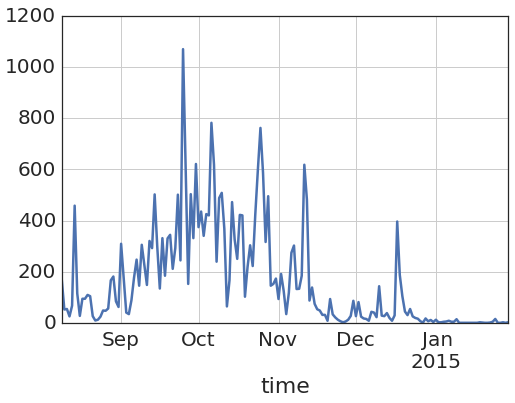

In [10]:
commentsDist.resample('d',how='count')['time'].plot()
plt.savefig('comment_time_dist_1849516.png',dpi=200)

###### 2013 COntent

In [ ]:
postsDist=pd.read_sql_query('select time from posts_2013 where parent=1849516',conn)
commentsDist=pd.read_sql_query('select time from comments3 where parent=1849516',conn)
commentsDist['diff']=commentsDist['time'].apply(lambda x:x-postsDist.irow(0))
commentsDist['diff']=commentsDist['diff'].apply(lambda x:pd.tslib.Timedelta(x).total_seconds())